In [1]:
import pandas as pd
import numpy as np

In [2]:
service_df = pd.read_pickle('customer_service_reps')

In [3]:
service_df.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


In [4]:
service_df.shape

(2208643, 13)

In [5]:
service_df_dup = service_df.drop_duplicates(subset=['subid'],keep='last')

In [6]:
service_df_dup.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
9,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,1,2020-04-02 01:20:25,NaT,NaN
11,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,1,2020-03-28 06:47:31,NaT,NaN
13,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,1,2020-03-28 05:09:22,NaT,NaN
15,38637729,24230000,True,NaT,2020-03-27 22:59:09,0,True,google,1.1377,1,2020-03-28 04:59:17,NaT,NaN


In [7]:
service_df_dup.shape

(1369360, 13)

In [8]:
service_df_dup['revenue_net_1month'].value_counts()

 0.0000    823719
 4.5875     98917
 1.1377     73461
 3.5232     46261
 5.3215     36512
            ...  
-4.1104         1
-5.8720         1
-7.5969         1
-5.0279         1
-5.7619         1
Name: revenue_net_1month, Length: 286, dtype: int64

In [9]:
service_df.columns

Index(['customer_service_rep_id', 'subid', 'current_sub_TF', 'cancel_date',
       'account_creation_date', 'num_trial_days', 'trial_completed_TF',
       'billing_channel', 'revenue_net_1month', 'payment_period',
       'last_payment', 'next_payment', 'renew'],
      dtype='object')

In [10]:
subscribers_df = pd.read_csv('subscribers.csv')

In [11]:
subscribers_df.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [12]:
subscribers_df.shape

(227628, 31)

In [13]:
subscribers_df.columns

Index(['Unnamed: 0', 'subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'country',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'trial_end_date',
       'initial_credit_card_declined', 'join_fee', 'language', 'payment_type',
       'num_trial_days', 'current_sub_TF', 'payment_period', 'last_payment',
       'next_payment', 'cancel_date', 'trial_completed'],
      dtype='object')

In [14]:
subscribers_df['monthly_price'].value_counts()

4.7343    227101
5.1013       325
1.0643       167
4.4407        18
4.3673        12
4.0003         2
0.8074         1
1.1744         1
4.6976         1
Name: monthly_price, dtype: int64

In [15]:
channel_df = pd.read_csv('channel_spend_graduate.csv')
channel_df.head()

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90


In [20]:
channel_viz = pd.DataFrame()

In [26]:
channel_viz = channel_df[['channel','date','spend_AED']]
channel_viz['date'] = pd.to_datetime(channel_viz['date'],format='%Y%m')
channel_viz_pivot = channel_viz.pivot(index='date', columns='channel', values='spend_AED')

In [27]:
channel_viz_pivot

channel,bing,display,facebook,search,youtube
date,,,,,
2019-07-01,400,12,9000,13000,90
2019-08-01,900,20,13000,18500,180
2019-09-01,1000,13,10500,19000,100
2019-10-01,1100,19,17000,24000,130
2019-11-01,1300,29,23000,25000,550
2019-12-01,300,31,16000,38000,900
2020-01-01,2100,148,11000,41000,4360
2020-02-01,3700,94,14000,44000,2420


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

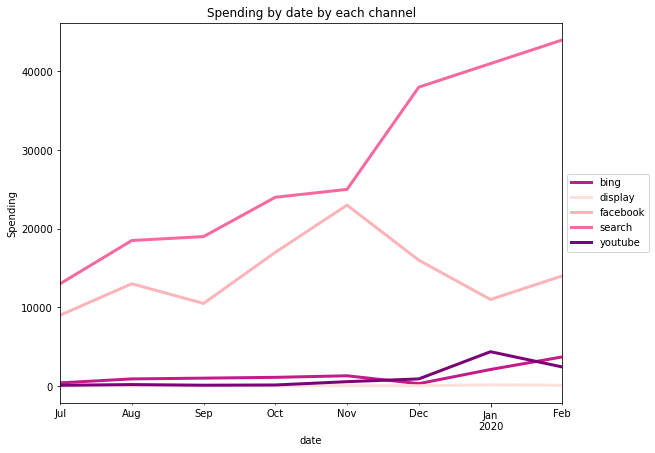

In [78]:
fig,ax = plt.subplots(figsize=(9,7))
channel_viz_pivot['bing'].plot(ax=ax,linewidth=3,color='#c51b8a')
channel_viz_pivot['display'].plot(ax=ax,linewidth=3,color='#fde0dd')
channel_viz_pivot['facebook'].plot(ax=ax,linewidth=3,color='#fbb4b9')
channel_viz_pivot['search'].plot(ax=ax,linewidth=3,color='#f768a1')
channel_viz_pivot['youtube'].plot(ax=ax,linewidth=3,color='#7a0177')
ax.set_title('Spending by date by each channel')
ax.set_ylabel('Spending')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [33]:
engagement_df = pd.read_pickle('engagement')
engagement_df.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [34]:
engagement_df.columns

Index(['subid', 'date', 'app_opens', 'cust_service_mssgs',
       'num_videos_completed', 'num_videos_more_than_30_seconds',
       'num_videos_rated', 'num_series_started', 'payment_period'],
      dtype='object')

In [35]:
engagement_df.shape

(2585724, 9)

In [36]:
engagement_df_nodate = engagement_df.drop('date', axis=1)

In [37]:
engagement_df_dup = engagement_df_nodate.groupby('subid').sum()

In [38]:
payment_dup = engagement_df_nodate.groupby('subid')['payment_period'].max().to_frame()

In [39]:
engagement_df_dup = engagement_df_dup.drop('payment_period',axis=1)
engagement_df_dup = pd.merge(engagement_df_dup,payment_dup,right_index=True,left_index=True,how='inner')

In [40]:
engagement_df_dup

,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
subid,,,,,,,
20000062,4.0,3.0,6.0,23.0,0.0,1.0,0.0
20000405,5.0,4.0,13.0,17.0,0.0,1.0,0.0
20000604,14.0,5.0,8.0,68.0,0.0,1.0,1.0
20000685,46.0,10.0,14.0,165.0,0.0,8.0,1.0
20000741,1.0,1.0,2.0,7.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
29999740,15.0,3.0,11.0,31.0,0.0,0.0,0.0
29999820,12.0,6.0,22.0,50.0,0.0,7.0,0.0
29999822,5.0,4.0,2.0,25.0,0.0,1.0,0.0


In [41]:
subsub_df = pd.read_pickle('subscribers')

In [42]:
subsub_df.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,...,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,...,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,...,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,...,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,...,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,...,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


In [43]:
subsub_df.columns

Index(['subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'retarget_TF', 'age', 'male_TF',
       'country', 'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'creation_until_cancel_days',
       'cancel_before_trial_end', 'trial_end_date',
       'initial_credit_card_declined', 'revenue_net', 'join_fee', 'language',
       'paid_TF', 'refund_after_trial_TF', 'payment_type'],
      dtype='object')

In [44]:
subsub_df['retarget_TF'].value_counts()

False    219825
True       7803
Name: retarget_TF, dtype: int64

# Attribution

In [45]:
new_sub = subscribers_df[['subid','attribution_technical','account_creation_date']]

In [46]:
new_sub['account_creation_date'] = new_sub.account_creation_date.apply(lambda x:pd.to_datetime(x)).copy()
new_sub['account_creation_month']= new_sub.account_creation_date.dt.year.apply(lambda x:str(x)) + new_sub.account_creation_date.dt.month.map("{:02}".format).apply(lambda x:str(x)).copy()

<ipython-input-46-e8dcd9266457>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_sub['account_creation_date'] = new_sub.account_creation_date.apply(lambda x:pd.to_datetime(x)).copy()
<ipython-input-46-e8dcd9266457>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_sub['account_creation_month']= new_sub.account_creation_date.dt.year.apply(lambda x:str(x)) + new_sub.account_creation_date.dt.month.map("{:02}".format).apply(lambda x:str(x)).copy()


In [47]:
channel_df_pivot = channel_df.pivot(index='date', columns='channel', values='spend_AED')

In [48]:
channel_df_pivot

channel,bing,display,facebook,search,youtube
date,,,,,
201907,400,12,9000,13000,90
201908,900,20,13000,18500,180
201909,1000,13,10500,19000,100
201910,1100,19,17000,24000,130
201911,1300,29,23000,25000,550
201912,300,31,16000,38000,900
202001,2100,148,11000,41000,4360
202002,3700,94,14000,44000,2420


In [49]:
channel_sum = channel_df_pivot.sum(axis=0).to_frame()

In [50]:
channel_sum.columns = ['total_spending']

In [51]:
channel_sum

,total_spending
channel,
bing,10800
display,366
facebook,113500
search,222500
youtube,8730


In [52]:
channels = list(channel_sum.index)

In [53]:
sub_channels = subscribers_df.loc[subscribers_df['attribution_technical'].isin(channels),]

In [54]:
sub_each_channel = sub_channels.groupby('attribution_technical').size().to_frame()
sub_each_channel.columns = ['num_sub']

In [55]:
sub_each_channel

,num_sub
attribution_technical,
bing,1146
display,1407
facebook,80251
search,25306
youtube,913


In [56]:
channel_cac = channel_sum.merge(sub_each_channel,how='inner',left_index=True, right_index=True)
channel_cac['average_CAC'] = channel_cac['total_spending'] / channel_cac['num_sub']

In [57]:
channel_cac

,total_spending,num_sub,average_CAC
channel,,,
bing,10800,1146,9.424084
display,366,1407,0.260128
facebook,113500,80251,1.414313
search,222500,25306,8.792381
youtube,8730,913,9.561884


In [58]:
channel_cac = channel_cac.sort_values(by='average_CAC')

C:\Users\Susie\anaconda3-3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Average CAC By Channel'}, xlabel='channel', ylabel='average_CAC'>

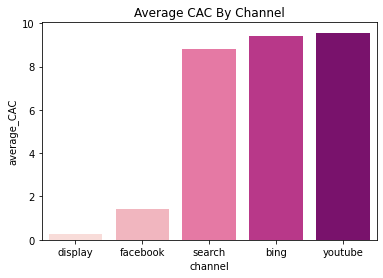

In [61]:
ax = sns.barplot(channel_cac.index, y=channel_cac['average_CAC'], palette="RdPu")
ax.set_title('Average CAC By Channel')
ax

In [62]:
new_sub_channels = new_sub.loc[new_sub['attribution_technical'].isin(channels),]

In [63]:
new_sub_pivot = new_sub_channels.pivot_table(index='account_creation_month', columns='attribution_technical', values='subid',aggfunc=pd.Series.nunique)

In [64]:
new_sub_pivot_m = new_sub_pivot.reset_index()
new_sub_pivot_m['account_creation_month'] = new_sub_pivot_m['account_creation_month'].astype(int) 

In [65]:
channel_df_pivot_m = channel_df_pivot.reset_index()

In [66]:
new_sub_bymonth = pd.merge(new_sub_pivot_m,channel_df_pivot_m,left_on='account_creation_month',right_on='date',how='inner')

In [67]:
new_sub_bymonth

,account_creation_month,bing_x,display_x,facebook_x,search_x,youtube_x,date,bing_y,display_y,facebook_y,search_y,youtube_y
0,201907,120,44,10011,1328,8,201907,400,12,9000,13000,90
1,201908,71,74,9855,1939,15,201908,900,20,13000,18500,180
2,201909,84,12,6129,1852,2,201909,1000,13,10500,19000,100
3,201910,86,50,9489,2333,11,201910,1100,19,17000,24000,130
4,201911,103,90,12995,2510,47,201911,1300,29,23000,25000,550
5,201912,28,112,9288,3770,76,201912,300,31,16000,38000,900
6,202001,172,536,6289,4073,370,202001,2100,148,11000,41000,4360
7,202002,303,341,7988,4300,205,202002,3700,94,14000,44000,2420


In [68]:
acac_bymonth = pd.DataFrame()
acac_bymonth['date'] = new_sub_bymonth['date']
acac_bymonth['bing'] = new_sub_bymonth['bing_y'] / new_sub_bymonth['bing_x']
acac_bymonth['display'] = new_sub_bymonth['display_y'] / new_sub_bymonth['display_x']
acac_bymonth['facebook'] = new_sub_bymonth['facebook_y'] / new_sub_bymonth['facebook_x']
acac_bymonth['search'] = new_sub_bymonth['search_y'] / new_sub_bymonth['search_x']
acac_bymonth['youtube'] = new_sub_bymonth['youtube_y'] / new_sub_bymonth['youtube_x']

In [69]:
acac_bymonth['date'] = pd.to_datetime(acac_bymonth['date'], format='%Y%m')

In [70]:
acac_bymonth = acac_bymonth.set_index('date')

In [71]:
acac_bymonth

,bing,display,facebook,search,youtube
date,,,,,
2019-07-01,3.333333,0.272727,0.899011,9.789157,11.250000
2019-08-01,12.676056,0.270270,1.319127,9.541001,12.000000
2019-09-01,11.904762,1.083333,1.713167,10.259179,50.000000
2019-10-01,12.790698,0.380000,1.791548,10.287184,11.818182
2019-11-01,12.621359,0.322222,1.769912,9.960159,11.702128
2019-12-01,10.714286,0.276786,1.722653,10.079576,11.842105
2020-01-01,12.209302,0.276119,1.749086,10.066290,11.783784
2020-02-01,12.211221,0.275660,1.752629,10.232558,11.804878


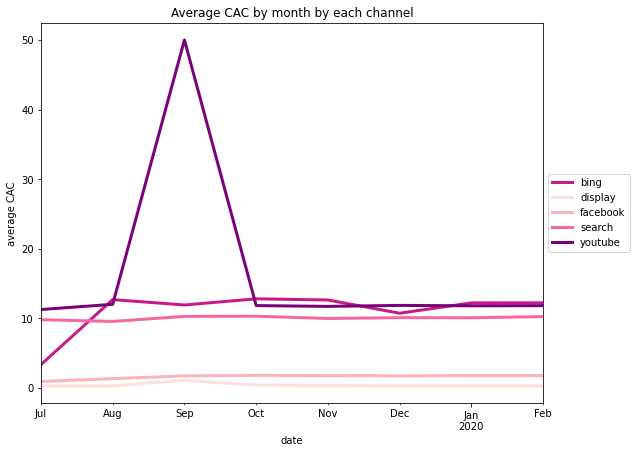

In [77]:
fig,ax = plt.subplots(figsize=(9,7))

acac_bymonth['bing'].plot(ax=ax,linewidth=3,color='#c51b8a')
acac_bymonth['display'].plot(ax=ax,linewidth=3,color='#fde0dd')
acac_bymonth['facebook'].plot(ax=ax,linewidth=3,color='#fbb4b9')
acac_bymonth['search'].plot(ax=ax,linewidth=3,color='#f768a1')
acac_bymonth['youtube'].plot(ax=ax,linewidth=3,color='#7a0177')

ax.set_title('Average CAC by month by each channel')
ax.set_ylabel('average CAC')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [79]:
custom_sub = service_df.merge(subscribers_df,how='inner',left_on='subid', right_on='subid')

In [80]:
custom_sub.head()

,customer_service_rep_id,subid,current_sub_TF_x,cancel_date_x,account_creation_date_x,num_trial_days_x,trial_completed_TF,billing_channel,revenue_net_1month,payment_period_x,...,join_fee,language,payment_type,num_trial_days_y,current_sub_TF_y,payment_period_y,last_payment_y,next_payment_y,cancel_date_y,trial_completed
0,30034436,21697364,False,2020-04-08 13:16:39,2020-03-27 23:59:06,14,False,OTT,0.0000,0,...,0.3303,ar,NaN,14,True,0,NaN,2020-04-10 23:59:06,NaN,True
1,34138852,20407871,False,2020-04-01 05:42:28,2020-03-27 23:58:49,14,False,OTT,0.0000,0,...,0.0000,ar,NaN,14,True,0,NaN,2020-04-10 23:58:49,NaN,True
2,33808892,27818002,False,2020-04-08 22:00:59,2020-03-27 23:53:40,14,False,OTT,0.0000,0,...,0.3303,ar,NaN,14,True,0,NaN,2020-04-10 23:53:40,NaN,True
3,34413500,23796492,True,NaT,2020-03-27 23:52:29,14,True,OTT,4.5875,0,...,0.0367,ar,Standard Charter,14,True,0,NaN,2020-04-10 23:52:29,NaN,True
4,34413500,23796492,True,NaT,2020-03-27 23:52:29,14,True,OTT,4.5875,1,...,0.0367,ar,Standard Charter,14,True,0,NaN,2020-04-10 23:52:29,NaN,True


# Customer Segementation

In [80]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [20]:
subscribers_df.columns

Index(['Unnamed: 0', 'subid', 'package_type', 'num_weekly_services_utilized',
       'preferred_genre', 'intended_use', 'weekly_consumption_hour',
       'num_ideal_streaming_services', 'age', 'male_TF', 'country',
       'attribution_technical', 'attribution_survey', 'op_sys',
       'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'trial_end_date',
       'initial_credit_card_declined', 'join_fee', 'language', 'payment_type',
       'num_trial_days', 'current_sub_TF', 'payment_period', 'last_payment',
       'next_payment', 'cancel_date', 'trial_completed'],
      dtype='object')

In [258]:
subscribers_df['package_type'].value_counts()

base        111464
enhanced     63241
economy      17349
Name: package_type, dtype: int64

In [81]:
customer_df = subscribers_df[['subid','package_type','preferred_genre','weekly_consumption_hour','male_TF']]
#customer_df = subscribers_df[['subid','package_type','preferred_genre','intended_use','weekly_consumption_hour','male_TF']]

In [82]:
customer_df

,subid,package_type,preferred_genre,weekly_consumption_hour,male_TF
0,21724479,economy,comedy,NaN,False
1,23383224,base,comedy,22.951579,False
2,26844789,enhanced,regional,36.001186,True
3,29417030,base,drama,20.051667,False
4,26723159,base,comedy,22.951579,False
...,...,...,...,...,...
227623,21434712,enhanced,comedy,28.751405,False
227624,25843074,enhanced,comedy,27.301448,False
227625,24799085,base,comedy,31.651317,False
227626,21308040,base,comedy,NaN,False


In [83]:
customer_df.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\Susie\anaconda3-3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [84]:
customer_df = customer_df.dropna(axis=0)
customer_df = customer_df.set_index('subid')

In [85]:
customer_dum = pd.get_dummies(customer_df)

In [278]:
#customer_df['package_dum'] = customer_df['package_type'].map({'base': 0, 'enhanced': 1, 'economy': 2})
#customer_df['genre_dum'] = customer_df['preferred_genre'].map({'comedy': 0, 'drama': 1, 'regional': 2,'international': 3,'other': 4 })
#customer_df['use_dum'] = customer_df['intended_use'].map({'access to exclusive content': 0, 'replace OTT': 1, 'supplement OTT': 2,'expand regional access': 3,'expand international access': 4,'other': 5,'education': 6})
#customer_df['male_dum'] = customer_df['male_TF'].map({False: 0, True: 1 })
#customer_dum = customer_df[['package_dum','genre_dum','weekly_consumption_hour','male_dum']]
#customer_dum = customer_df[['package_dum','genre_dum','use_dum','weekly_consumption_hour','male_dum']]
#customer_dum = customer_dum.astype(int)

In [86]:
cus_eng_dum = pd.merge(customer_dum,engagement_df_dup,right_index=True,left_index=True,how='inner')

In [87]:
cus_eng_dum.head()

,weekly_consumption_hour,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
subid,,,,,,,,,,,,,,,,,,
26844789,36.001186,0,0,1,0,0,0,0,1,0,1,2.0,2.0,13.0,13.0,0.0,1.0,0.0
29726122,20.051667,1,0,0,1,0,0,0,0,1,0,40.0,17.0,182.0,182.0,6.0,39.0,1.0
20299962,34.551230,1,0,0,0,1,0,0,0,1,0,104.0,10.0,84.0,206.0,0.0,29.0,1.0
24930568,25.851492,1,0,0,1,0,0,0,0,1,0,3.0,3.0,2.0,13.0,0.0,0.0,0.0
21361112,37.451142,0,0,1,1,0,0,0,0,0,1,4.0,3.0,2.0,12.0,0.0,0.0,0.0


In [88]:
train,test = train_test_split(customer_dum,random_state=73,test_size=0.2)

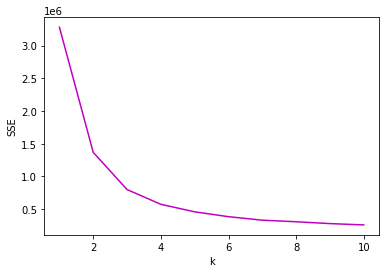

In [90]:
# Find K
SSE = []
for k in range(1, 11):
    estimator = KMeans(n_clusters=k)
    estimator.fit(train)
    SSE.append(estimator.inertia_)
X = range(1, 11)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'm-')
plt.show()

In [284]:
model = KMeans(n_clusters=3)
model.fit(train)

KMeans(n_clusters=3)

In [285]:
model.cluster_centers_

array([[2.36581028e+01, 5.66861300e-01, 1.01809132e-01, 3.31329568e-01,
        6.52684981e-01, 2.44835838e-01, 3.45553747e-02, 2.20924667e-02,
        4.58313391e-02, 9.92801761e-01, 7.19823873e-03],
       [3.72978812e+01, 5.11686794e-01, 1.15374627e-01, 3.72938579e-01,
        5.42462018e-01, 3.12881444e-01, 4.88248279e-02, 2.65549929e-02,
        6.92767173e-02, 2.82171147e-01, 7.17828853e-01],
       [2.96097837e+01, 5.55374679e-01, 9.97965142e-02, 3.44828807e-01,
        6.27143236e-01, 2.49650535e-01, 4.02901884e-02, 2.56569052e-02,
        5.72591347e-02, 8.99708042e-01, 1.00291958e-01]])

In [286]:
train_labels = model.labels_
test_labels = model.predict(test)

In [287]:
train_index = train.index
train_labels = pd.DataFrame(train_labels,index=train_index)
test_index = test.index
test_labels = pd.DataFrame(test_labels,index=test_index)

In [288]:
train_labels['train/test'] = 'Train'
test_labels['train/test'] = 'Test'

In [289]:
labels = pd.concat([train_labels,test_labels])
labels.rename(columns={0:'label'},inplace=True)

In [292]:
output = pd.merge(cus_eng_dum,labels,right_index=True,left_index=True,how='inner')

In [293]:
output

,weekly_consumption_hour,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,label,train/test
subid,,,,,,,,,,,,,,,,,,,,
26844789,36.001186,0,0,1,0,0,0,0,1,0,1,2.0,2.0,13.0,13.0,0.0,1.0,0.0,1,Train
29726122,20.051667,1,0,0,1,0,0,0,0,1,0,40.0,17.0,182.0,182.0,6.0,39.0,1.0,0,Train
20299962,34.551230,1,0,0,0,1,0,0,0,1,0,104.0,10.0,84.0,206.0,0.0,29.0,1.0,1,Train
24930568,25.851492,1,0,0,1,0,0,0,0,1,0,3.0,3.0,2.0,13.0,0.0,0.0,0.0,0,Train
21361112,37.451142,0,0,1,1,0,0,0,0,0,1,4.0,3.0,2.0,12.0,0.0,0.0,0.0,1,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25492551,30.201361,1,0,0,1,0,0,0,0,1,0,3.0,4.0,12.0,13.0,0.0,1.0,0.0,2,Train
25549852,28.751405,0,0,1,1,0,0,0,0,1,0,1.0,2.0,0.0,6.0,0.0,0.0,0.0,2,Train
25835684,24.401536,1,0,0,0,1,0,0,0,1,0,31.0,5.0,47.0,59.0,0.0,8.0,0.0,0,Test


In [294]:
output.to_csv('cluster_output.csv')

In [198]:
#output2 = pd.merge(output,engagement_df_dup,right_index=True,left_index=True,how='inner')

In [200]:
#output2.to_csv('cluster_merge_output2.csv')

In [3]:
output = pd.read_csv('cluster_output.csv')

In [5]:
output_1 = output.loc[output['label'] == 0,]

In [7]:
output_2 = output.loc[output['label'] == 1,]

In [8]:
output_3 = output.loc[output['label'] == 2,]

In [10]:
output_1.describe()

,subid,weekly_consumption_hour,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,label
count,3.615000e+04,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.000000,36150.0
mean,2.500854e+07,23.706231,0.567773,0.097068,0.335159,0.653444,0.240692,0.033333,0.023264,0.049267,0.993887,0.006113,27.921964,5.848520,36.434440,58.069516,0.666030,8.337925,0.264620,0.0
std,2.884540e+06,2.260230,0.495392,0.296054,0.472053,0.475879,0.427509,0.179508,0.150743,0.216428,0.077950,0.077950,57.461304,7.107048,57.950155,70.933874,3.395321,14.422161,0.526502,0.0
min,2.000068e+07,-32.146760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.251933e+07,22.951579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,5.000000,16.000000,0.000000,0.000000,0.000000,0.0
50%,2.499485e+07,24.401536,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,3.000000,13.000000,32.000000,0.000000,2.000000,0.000000,0.0
75%,2.751795e+07,25.851492,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,26.000000,6.000000,39.000000,60.000000,0.000000,9.000000,0.000000,0.0
max,2.999982e+07,25.851492,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1260.000000,109.000000,355.000000,542.000000,128.000000,76.000000,3.000000,0.0


In [13]:
output_1.to_csv('cluster1.csv')

In [11]:
output_2.describe()

,subid,weekly_consumption_hour,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,label
count,1.034100e+04,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.00000,10341.00000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.000000,10341.0
mean,2.497328e+07,37.170994,0.513393,0.105986,0.380621,0.546562,0.307224,0.044580,0.026593,0.075041,0.29707,0.70293,35.866454,6.059956,41.681849,71.685040,0.705541,10.914708,0.418431,1.0
std,2.880075e+06,2.992661,0.499845,0.307834,0.485563,0.497851,0.461365,0.206389,0.160899,0.263470,0.45699,0.45699,69.114113,7.082075,61.763741,80.750039,3.247948,16.776753,0.600326,0.0
min,2.000247e+07,34.551230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.242438e+07,34.551230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,4.000000,2.000000,5.000000,17.000000,0.000000,0.000000,0.000000,1.0
50%,2.498578e+07,36.001186,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.00000,10.000000,3.000000,14.000000,36.000000,0.000000,3.000000,0.000000,1.0
75%,2.749074e+07,38.901099,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.00000,38.000000,7.000000,48.000000,84.000000,0.000000,12.000000,1.000000,1.0
max,2.999863e+07,75.150006,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1081.000000,109.000000,331.000000,517.000000,87.000000,76.000000,3.000000,1.0


In [14]:
output_2.to_csv('cluster2.csv')

In [12]:
output_3.describe()

,subid,weekly_consumption_hour,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,label
count,3.962600e+04,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.000000,39626.0
mean,2.500054e+07,29.607070,0.559204,0.093247,0.347550,0.630369,0.243047,0.037652,0.027936,0.060995,0.908419,0.091581,30.456645,5.952203,38.981603,61.858149,0.706657,9.073992,0.297052,2.0
std,2.888612e+06,1.906076,0.496489,0.290782,0.476198,0.482711,0.428929,0.190356,0.164792,0.239325,0.288438,0.288438,60.148853,7.145496,60.191400,74.008219,3.616207,15.134447,0.549032,0.0
min,2.000040e+07,26.771789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,2.249291e+07,27.301448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,2.000000,6.000000,17.000000,0.000000,0.000000,0.000000,2.0
50%,2.500267e+07,28.751405,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,3.000000,14.000000,32.000000,0.000000,2.000000,0.000000,2.0
75%,2.751363e+07,31.651317,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,30.000000,7.000000,42.000000,63.000000,0.000000,10.000000,1.000000,2.0
max,2.999982e+07,33.101274,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1255.000000,167.000000,333.000000,569.000000,158.000000,77.000000,3.000000,2.0


In [15]:
output_3.to_csv('cluster3.csv')

# Churn

In [91]:
subchurn_tf = service_df_dup[['subid','current_sub_TF']].set_index('subid')
subchurn_tf['churn_TF'] = subchurn_tf['current_sub_TF'].map({False: 1, True: 0 })
subchurn_tf = subchurn_tf.drop('current_sub_TF',axis=1)

In [92]:
selected_y = cus_eng_dum.drop(['weekly_consumption_hour','num_videos_completed'],axis=1)

In [365]:
#gender_dum = customer_dum[['male_TF_False','weekly_consumption_hour']]

In [366]:
#ser_sub = pd.merge(gender_dum,engagement_df_dup,right_index=True,left_index=True,how='inner')

In [93]:
churn_df = pd.merge(selected_y,subchurn_tf,right_index=True,left_index=True,how='inner')

In [94]:
churn_df

,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,preferred_genre_other,preferred_genre_regional,male_TF_False,male_TF_True,app_opens,cust_service_mssgs,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period,churn_TF
subid,,,,,,,,,,,,,,,,,
26844789,0,0,1,0,0,0,0,1,0,1,2.0,2.0,13.0,0.0,1.0,0.0,1
29726122,1,0,0,1,0,0,0,0,1,0,40.0,17.0,182.0,6.0,39.0,1.0,0
20299962,1,0,0,0,1,0,0,0,1,0,104.0,10.0,206.0,0.0,29.0,1.0,0
24930568,1,0,0,1,0,0,0,0,1,0,3.0,3.0,13.0,0.0,0.0,0.0,1
21361112,0,0,1,1,0,0,0,0,0,1,4.0,3.0,12.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25492551,1,0,0,1,0,0,0,0,1,0,3.0,4.0,13.0,0.0,1.0,0.0,1
25549852,0,0,1,1,0,0,0,0,1,0,1.0,2.0,6.0,0.0,0.0,0.0,1
25835684,1,0,0,0,1,0,0,0,1,0,31.0,5.0,59.0,0.0,8.0,0.0,1


In [95]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn import model_selection
import copy
import math

In [96]:
pd.options.display.max_columns = 25

In [97]:
def apply_offers(df, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn):
    df_f = copy.deepcopy(df)

    # set offer parameters for all observations
    df_f['price_no_offer'] = base_price
    df_f.loc[df_f['churn_TF'] == 1, 'price_no_offer'] = 0  # if the person churns they will pay 0

    # determine whether indiviudals accept offer
    df_f.loc[df_f['churn_TF'] == 1, 'accept_offer_prob'] = acceptance_rate_churn  # those who were going to churn are less likely to want the offer than those who were going to stay
    df_f.loc[df_f['churn_TF'] == 0, 'accept_offer_prob'] = acceptance_rate_nonchurn
    df_f['would_accept_offer_rand_draw'] = (df_f['random_draws'] < df_f['accept_offer_prob'])  # randomly select the individuals who would accept an offer based on their probability of acceptance

    # make offer under lpm predictions for select threshold
    df_f['make_offer_lpm'] = (df_f['prob_churn_lpm'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_lpm'] = (df_f['make_offer_lpm'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_lpm_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_lpm'], 'price_lpm_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    # make offer under logit predictions for select threshold
    df_f['make_offer_logit'] = (df_f['prob_churn_logit'] > threshold)     # predict whether individual will churn or not
    df_f['accept_offer_logit'] = (df_f['make_offer_logit'] & df_f['would_accept_offer_rand_draw'])
    df_f['price_logit_offer'] = df_f['price_no_offer']  # initialize prices from "do nothing case"
    df_f.loc[df_f['accept_offer_logit'], 'price_logit_offer'] = base_price * (1-discount_amount)    # for those who were both made an offer and would accept, set prices to discounted price

    df_impact = pd.DataFrame(index=cases, columns=['subs', 'revenue', 'lift_from_no_offer'])
    for c in cases:
        df_impact.loc[c, 'subs'] = (df_f['price_' + c] > 0).sum()
        df_impact.loc[c, 'revenue'] = df_f['price_' + c].sum()
    for c in cases:
        df_impact.loc[c, 'lift_from_no_offer'] = df_impact.loc[c, 'revenue'] / df_impact.loc['no_offer', 'revenue'] - 1

    return df_f, df_impact

In [98]:
def get_gini_info(actual, pred_prob):
    # format[[obs0_pred0, obs0_pred1], [obs1_pred0, obs1_pred1]]; rows (i) are observed, columns (j) are predicted
    confusion_matrix_list = list()
    for t in [x / 100 for x in range(0, 100, 33)]:
        pred = [1 if (x > t) else 0 for x in pred_prob]
        confusion_matrix_list.append(confusion_matrix(actual, pred))
        # confusion_matrix_list.append(model.pred_table(threshold=t))

    # create Gini coefficient plots
    false_positives = list()
    true_positives = list()
    for t in confusion_matrix_list:
        true_positives.append(t[1, 1])
        false_positives.append(t[0, 1])

    return confusion_matrix_list, false_positives, true_positives

In [99]:
df_train, df_test = model_selection.train_test_split(churn_df, test_size=0.3)

In [100]:
y_col_name = 'churn_TF'
x_col_name = list(selected_y.columns)
add_constant_TF = True

In [101]:
if add_constant_TF:
    x_col_name.append('const')
    df_train = sm.add_constant(df_train)
    df_test = sm.add_constant(df_test)

In [104]:
lpm_model = sm.OLS(endog=df_train[y_col_name], exog=df_train[x_col_name])
lpm_results = lpm_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(lpm_results.summary())

## check pvalue


RESULTS OF LOGIT MODEL FITTING

                            OLS Regression Results                            
Dep. Variable:               churn_TF   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     5428.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:05:35   Log-Likelihood:                -3598.7
No. Observations:               60281   AIC:                             7225.
Df Residuals:                   60267   BIC:                             7352.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [105]:
logit_model = sm.Logit(endog=df_train[y_col_name], exog=df_train[x_col_name])
logit_results = logit_model.fit()
print("\nRESULTS OF LOGIT MODEL FITTING\n")
print(logit_results.summary())

Optimization terminated successfully.
         Current function value: 0.215598
         Iterations 8

RESULTS OF LOGIT MODEL FITTING

                           Logit Regression Results                           
Dep. Variable:               churn_TF   No. Observations:                60281
Model:                          Logit   Df Residuals:                    60264
Method:                           MLE   Df Model:                           16
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.5323
Time:                        19:05:35   Log-Likelihood:                -12996.
converged:                       True   LL-Null:                       -27789.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
package_type_base                

In [106]:
# ----- EVALUATE MODEL PERFORMANCE -----
# --- evaluate model predictions on test set graphically
df_test['prob_churn_lpm'] = lpm_results.predict(df_test[x_col_name])
df_test['prob_churn_logit'] = logit_results.predict(df_test[x_col_name])

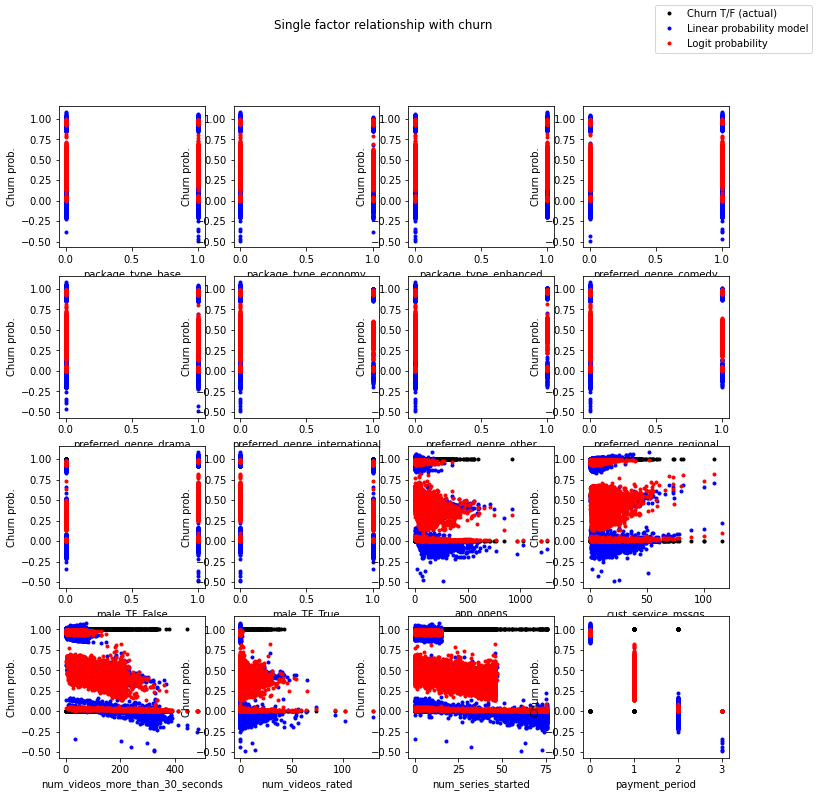

In [192]:
# plot predictions vs. data
select_plot_coef = [x for x in x_col_name if x != 'const']
n_rows = 4
n_cols = math.ceil(len(select_plot_coef) / n_rows)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12,12))
fig.suptitle('Single factor relationship with churn')
for i in range(n_rows):
    for j in range(n_cols):
        select_coef = select_plot_coef[i * n_cols + j]
        axes[i, j].plot(df_test[select_coef], df_test['churn_TF'], 'k.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_lpm'], 'b.')
        axes[i, j].plot(df_test[select_coef], df_test['prob_churn_logit'], 'r.')
        axes[i, j].set(xlabel=select_coef, ylabel='Churn prob.')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

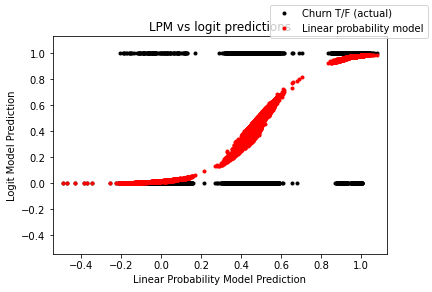

In [193]:
# compare lpm and logit predictions
fig = plt.figure()
ax = plt.gca()
ax.plot(df_test[['prob_churn_lpm']], df_test[['churn_TF']], 'k.')
ax.plot(df_test[['prob_churn_lpm']], df_test[['prob_churn_logit']], 'r.')
plt.ylim(df_test[['prob_churn_lpm', 'prob_churn_logit']].min().min()-.05, df_test[['prob_churn_lpm', 'prob_churn_logit']].max().max()+.05)
plt.xlim(ax.get_ylim())
plt.title('LPM vs logit predictions')
plt.xlabel('Linear Probability Model Prediction')
plt.ylabel('Logit Model Prediction')
fig.legend(labels=['Churn T/F (actual)', 'Linear probability model', 'Logit probability'])

In [107]:
# --- evaluate model predictions using numerical quantification (ROC curves)
# make confusion matrices
logit_conf_mat, logit_false_positives, logit_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_logit'])
lpm_conf_mat, lpm_false_positives, lpm_true_positives = get_gini_info(df_test['churn_TF'], df_test['prob_churn_lpm'])

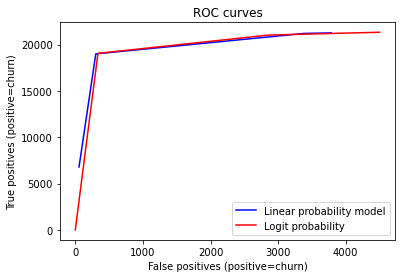

In [195]:
# plot ROC curves
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(lpm_false_positives, lpm_true_positives, 'b-')
ax1.plot(logit_false_positives, logit_true_positives, 'r-')
plt.title('ROC curves')
plt.xlabel('False positives (positive=churn)')
plt.ylabel('True positives (positive=churn)')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [108]:
# ----- TEST RETENTION OFFER SCENARIOS -----
# evaluate the impact of an offer
acceptance_rate_nonchurn = 1
acceptance_rate_churn = 0.3
threshold = 0.5
base_price = 5
discount_amount = 0.2
cases = ['no_offer', 'lpm_offer', 'logit_offer']

In [109]:
# draw whether individual would accept an offer or not - assume probability of acceptance is independent of offer attractiveness
df_test['random_draws'] = np.random.random(df_test.shape[0])

In [110]:
# base assessment
df_test, df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

# test sensitivity to thresholds
df_lift_threshold = pd.DataFrame(index=range(0, 100, 1), columns=['threshold'] + cases)
for t_ind in df_lift_threshold.index:
    t_threshold = t_ind / 100
    _, t_df_impact = apply_offers(df_test, t_threshold, base_price, discount_amount, cases, acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_threshold.loc[t_ind, 'threshold'] = t_threshold
    df_lift_threshold.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_threshold, t_ind

# test sensitivity to acceptance rate for churners
df_lift_acceptance_rate_churn = pd.DataFrame(index=range(0, 100, 1), columns=['acceptance_rate_churn'] + cases)
for t_ind in df_lift_acceptance_rate_churn.index:
    t_acceptance_rate_churn = t_ind / 100
    _, t_df_impact = apply_offers(df_test, threshold, base_price, discount_amount, cases, t_acceptance_rate_churn, acceptance_rate_nonchurn)

    df_lift_acceptance_rate_churn.loc[t_ind, 'acceptance_rate_churn'] = t_acceptance_rate_churn
    df_lift_acceptance_rate_churn.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_acceptance_rate_churn, t_ind

# test sensitivity to offer discount amount
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    acc_rate_churn = t_discount_amount
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acc_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
del t_df_impact, t_discount_amount, t_ind

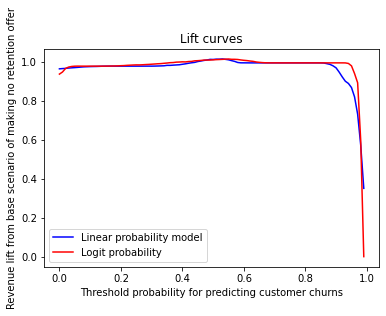

In [199]:
# --- plot lift curves
# Threshold sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['lpm_offer'], 'b-')
ax1.plot(df_lift_threshold['threshold'], df_lift_threshold['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Threshold probability for predicting customer churns')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

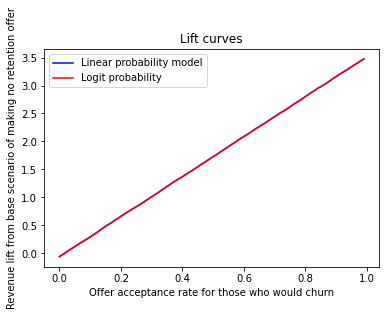

In [201]:
# Acceptance rate sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['lpm_offer'], 'b-')
ax1.plot(df_lift_acceptance_rate_churn['acceptance_rate_churn'], df_lift_acceptance_rate_churn['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer acceptance rate for those who would churn')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

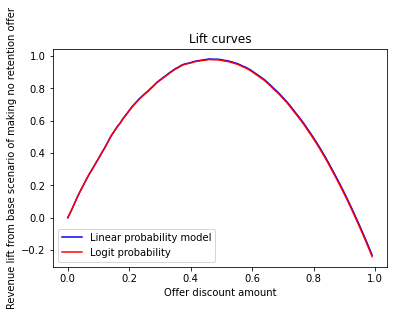

In [206]:
# Discount amount sensitivity
fig = plt.figure()
ax1 = plt.gca()
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['lpm_offer'], 'b-')
ax1.plot(df_lift_discount_amount['discount_amount'], df_lift_discount_amount['logit_offer'], 'r-')
plt.title('Lift curves')
plt.xlabel('Offer discount amount')
plt.ylabel('Revenue lift from base scenario of making no retention offer')
plt.legend(labels=['Linear probability model', 'Logit probability'])

In [111]:
df_lift_discount_amount = pd.DataFrame(index=range(0, 100, 1), columns=['discount_amount'] + cases)
for t_ind in df_lift_discount_amount.index:
    t_discount_amount = t_ind / 100
    acc_rate_churn = t_discount_amount
    _, t_df_impact = apply_offers(df_test, threshold, base_price, t_discount_amount, cases, acc_rate_churn, acceptance_rate_nonchurn)

    df_lift_discount_amount.loc[t_ind, 'discount_amount'] = t_discount_amount
    df_lift_discount_amount.loc[t_ind, cases] = t_df_impact.loc[cases, 'lift_from_no_offer']
# del t_df_impact, t_discount_amount, t_ind

In [113]:
df_lift_discount_amount.head()

,discount_amount,no_offer,lpm_offer,logit_offer
0,0.0,0.0,0.0,0.0
1,0.01,0.0,0.041205,0.040874
2,0.02,0.0,0.084357,0.084353
3,0.03,0.0,0.119451,0.119549
4,0.04,0.0,0.158444,0.158213


In [115]:
df_lift_discount_amount['lpm'] = pd.to_numeric(df_lift_discount_amount['lpm_offer'])

In [116]:
df_lift_discount_amount['lpm'].idxmax()

46

In [117]:
df_lift_discount_amount['log'] = pd.to_numeric(df_lift_discount_amount['logit_offer'])

In [118]:
df_lift_discount_amount['log'].idxmax()

46

In [121]:
df_lift_discount_amount['lpm'][46]

0.9857447754557582

In [207]:
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')

In [208]:
def roc_draw(y_test, pred):
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(6,6))
    plt.title('ROC')
    plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

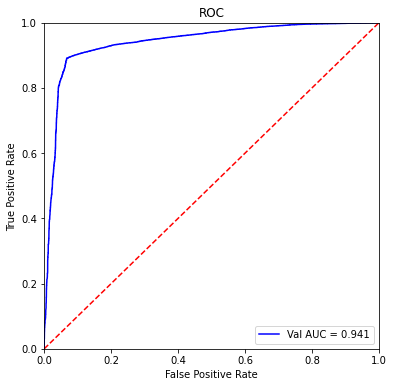

In [209]:
roc_draw(df_test['churn_TF'],df_test['prob_churn_lpm'])

In [126]:
service_df["revenue_net_1month"].describe()

count    2.208643e+06
mean     2.248010e+00
std      2.222221e+00
min     -7.596900e+00
25%      0.000000e+00
50%      1.137700e+00
75%      4.587500e+00
max      1.038610e+01
Name: revenue_net_1month, dtype: float64

In [127]:
service_df["revenue_net_1month"].max()

10.3861

In [128]:
subscribers_df['male_TF'].isnull().sum()

269